# Perceptrón binario paso a paso
Por Alfredo Díaz


**Objetivo:** mostrar con detalle numérico (cálculo "dígito a dígito") cómo funciona un perceptrón simple con 2 entradas, etiqueta binaria (0/1) y 10 ejemplos (samples o muestras).  
Incluye: inicialización reproducible (pesos `w1=w2=b` iguales), `forward propagation`, función escalón, cálculo de pérdida (MSE para propósito pedagógico), la regla del perceptrón (actualización online) con tasa de aprendizaje `0.1`, y entrenamiento hasta convergencia.

## 1) Dataset y contexto

Usaremos un dataset pequeño de 10 filas(muestras) con 2 variables de entrada `(x1, x2)` y etiqueta binaria `y` (0 o 1).  
La idea es facilitar todos los cálculos y mostrar cómo cambian los pesos y el bias tras cada muestra usando la **regla clásica del perceptrón**.

**Dataset (ejemplo):**

| fila | x1  | x2  | y |
|-----:|:---:|:---:|:-:|
| 1    | 0.0 | 0.0 | 0 |
| 2    | 0.0 | 1.0 | 0 |
| 3    | 1.0 | 0.0 | 0 |
| 4    | 1.0 | 1.0 | 1 |
| 5    | 0.8 | 0.9 | 1 |

> Nota: elegimos MSE solo para visualización de la pérdida; en problemas reales de clasificación binaria es más habitual usar **binary cross-entropy** con una salida sigmoidea.

In [ ]:
import numpy as np
import pandas as pd

#Dataset
data = pd.DataFrame({
    'x1': [0.0, 0.0, 1.0, 1.0, 0.8,
           0.2, 0.9, 0.3, 0.7, 0.6],

    'x2': [0.0, 1.0, 0.0, 1.0, 0.9,
           0.1, 0.8, 0.4, 0.6, 0.7],

    'y' : [0,   0,   0,   1,   1,
           0,   1,   0,   1,   1]
})


data

,x1,x2,y
0,0.0,0.0,0
1,0.0,1.0,0
2,1.0,0.0,0
3,1.0,1.0,1
4,0.8,0.9,1
5,0.2,0.1,0
6,0.9,0.8,1
7,0.3,0.4,0
8,0.7,0.6,1
9,0.6,0.7,1


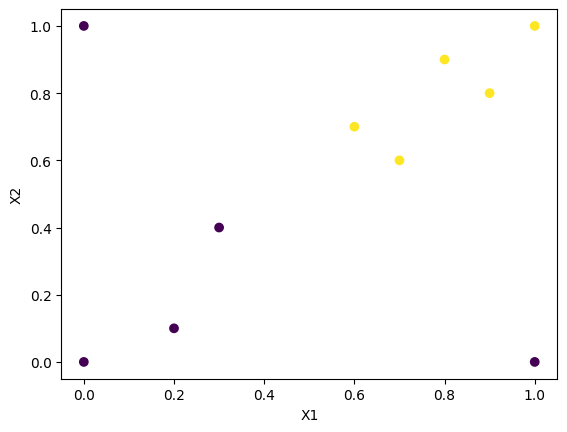

In [ ]:
#Scatter plot X1 y X2
import matplotlib.pyplot as plt
plt.scatter(data['x1'], data['x2'], c=data['y'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Ejecute la celda anterior para ver el dataset. A continuación inicializaremos los parámetros **w1, w2, b** con un valor aleatorio reproducible y **idéntico** para los tres (tal como se solicitó).

In [ ]:
rng = np.random.default_rng(seed=42)
init_val = float(np.round(rng.uniform(-0.5, 0.5), 3))
w1 = init_val
w2 = init_val
b  = init_val

print(f'Valor inicial (reproducible): {init_val}')
print(f'w1 = {w1}, w2 = {w2}, b = {b}')

Valor inicial (reproducible): 0.274
w1 = 0.274, w2 = 0.274, b = 0.274


## 2) Función de activación: escalón (step)

Definimos la función escalón como:


$\text{step}(z) =
\begin{cases}
1 & \text{si } z > 0,\\[4pt]
0 & \text{si } z \le 0.
\end{cases}$


En este notebook tomamos la convención **z=0 → 0**.

In [15]:
def step(z: float) -> int:
    """Función escalón: devuelve 1 si z>0, 0 en caso contrario."""
    return 1 if z > 0 else 0


def forward_one(x1, x2, w1, w2, b, verbose=True):
    """Calcula z = w1*x1 + w2*x2 + b y la predicción step(z).
       Si verbose=True imprime el cálculo detallado."""
    prod1 = w1 * x1
    prod2 = w2 * x2
    s = prod1 + prod2
    z = s + b
    y_hat = step(z)
    if verbose:
        print(f'Entrada: x1={x1}, x2={x2}')
        print(f'  w1*x1 = {w1} * {x1} = {prod1:.6f}')
        print(f'  w2*x2 = {w2} * {x2} = {prod2:.6f}')
        print(f'  suma parcial s = {prod1:.6f} + {prod2:.6f} = {s:.6f}')
        print(f'  z = s + b = {s:.6f} + {b:.6f} = {z:.6f}')
        print(f'  step(z) = {y_hat} (1 si z>0, 0 si z<=0)\n')
    return z, y_hat

## 3) Forward propagation inicial y cálculo de pérdida (MSE)
Esta primera ejecución es ua muestra, pero no es la solució del problema. Calculamos la predicción para cada fila con los pesos iniciales y mostramos el MSE:

In [ ]:
zs = []
y_hats = []
for i, row in data.iterrows():
    z, y_hat = forward_one(row['x1'], row['x2'], w1, w2, b, verbose=True)
    zs.append(z)
    y_hats.append(y_hat)

# Cálculo de MSE (para propósitos pedagógicos)
errors = data['y'].values - np.array(y_hats)

# imprimir una matriz con data['y'], y_hats y errors
results_df = pd.DataFrame({
    'y_true': data['y'],
    'y_pred': y_hats,
    'error': errors
})
display(results_df)


# Mostramos el error medio cuadrático al final
mse = float(np.mean(errors**2))
print(f'Predicciones iniciales: {y_hats}')
print(f'Errores (y - ŷ): {errors.tolist()}')
print(f'MSE inicial = {mse:.4f}')

Entrada: x1=0.0, x2=0.0
  w1*x1 = 0.274 * 0.0 = 0.000000
  w2*x2 = 0.274 * 0.0 = 0.000000
  suma parcial s = 0.000000 + 0.000000 = 0.000000
  z = s + b = 0.000000 + 0.274000 = 0.274000
  step(z) = 1 (1 si z>0, 0 si z<=0)

Entrada: x1=0.0, x2=1.0
  w1*x1 = 0.274 * 0.0 = 0.000000
  w2*x2 = 0.274 * 1.0 = 0.274000
  suma parcial s = 0.000000 + 0.274000 = 0.274000
  z = s + b = 0.274000 + 0.274000 = 0.548000
  step(z) = 1 (1 si z>0, 0 si z<=0)

Entrada: x1=1.0, x2=0.0
  w1*x1 = 0.274 * 1.0 = 0.274000
  w2*x2 = 0.274 * 0.0 = 0.000000
  suma parcial s = 0.274000 + 0.000000 = 0.274000
  z = s + b = 0.274000 + 0.274000 = 0.548000
  step(z) = 1 (1 si z>0, 0 si z<=0)

Entrada: x1=1.0, x2=1.0
  w1*x1 = 0.274 * 1.0 = 0.274000
  w2*x2 = 0.274 * 1.0 = 0.274000
  suma parcial s = 0.274000 + 0.274000 = 0.548000
  z = s + b = 0.548000 + 0.274000 = 0.822000
  step(z) = 1 (1 si z>0, 0 si z<=0)

Entrada: x1=0.8, x2=0.9
  w1*x1 = 0.274 * 0.8 = 0.219200
  w2*x2 = 0.274 * 0.9 = 0.246600
  suma parcial s = 0.2

,y_true,y_pred,error
0,0,1,-1
1,0,1,-1
2,0,1,-1
3,1,1,0
4,1,1,0
5,0,1,-1
6,1,1,0
7,0,1,-1
8,1,1,0
9,1,1,0


Predicciones iniciales: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Errores (y - ŷ): [-1, -1, -1, 0, 0, -1, 0, -1, 0, 0]
MSE inicial = 0.5000


## 4) Regla del perceptrón (actualización online)
La regla clásica del perceptrón (por ejemplo) para cada muestra es:

$$
\Delta w_j = \eta \cdot (y - \hat y) \cdot x_j, \qquad
\Delta b = \eta \cdot (y - \hat y)
$$

Donde $(\eta)$ es la tasa de aprendizaje (learning rate). En este notebook usamos $(\eta = 0.1)$.

In [ ]:
eta = 0.1

# Copiamos los parámetros para entrenar (no sobrescribimos en el notebook)
w1_train, w2_train, b_train = w1, w2, b

print('--- INICIO DE UNA ÉPOCA (actualizaciones online, orden 1→5) ---\n')
for i, row in data.iterrows():
    x1, x2, y_true = row['x1'], row['x2'], int(row['y'])
    print(f'Muestra {int(i)+1}: x1={x1}, x2={x2}, y={y_true}')
    z, y_hat = forward_one(x1, x2, w1_train, w2_train, b_train, verbose=True)
    error = y_true - y_hat
    print(f'  Error (y - ŷ) = {y_true} - {y_hat} = {error}')
    # Actualizaciones según regla del perceptrón
    delta_w1 = eta * error * x1
    delta_w2 = eta * error * x2
    delta_b  = eta * error
    print(f'  ∆w1 = {eta} * {error} * {x1} = {delta_w1:.6f}')
    print(f'  ∆w2 = {eta} * {error} * {x2} = {delta_w2:.6f}')
    print(f'  ∆b  = {eta} * {error} = {delta_b:.6f}')


    # Aplicar actualización
    w1_train += delta_w1
    w2_train += delta_w2
    b_train  += delta_b
    print(f'  Parámetros actualizados: w1={w1_train:.6f}, w2={w2_train:.6f}, b={b_train:.6f}\n')

print('--- FIN DE LA ÉPOCA ---\n')

print(f'Pesos tras 1 época: w1={w1_train:.6f}, w2={w2_train:.6f}, b={b_train:.6f}')
# Recalcular predicciones finales con los pesos actualizados
final_preds = []
for i, row in data.iterrows():
    z, y_hat = forward_one(row['x1'], row['x2'], w1_train, w2_train, b_train, verbose=False)
    final_preds.append(y_hat)
errors_after = data['y'].values - np.array(final_preds)
mse_after = float(np.mean(errors_after**2))
print(f'Predicciones tras 1 época: {final_preds}')
print(f'MSE tras 1 época = {mse_after:.4f}')

--- INICIO DE UNA ÉPOCA (actualizaciones online, orden 1→5) ---

Muestra 1: x1=0.0, x2=0.0, y=0
Entrada: x1=0.0, x2=0.0
  w1*x1 = 0.274 * 0.0 = 0.000000
  w2*x2 = 0.274 * 0.0 = 0.000000
  suma parcial s = 0.000000 + 0.000000 = 0.000000
  z = s + b = 0.000000 + 0.274000 = 0.274000
  step(z) = 1 (1 si z>0, 0 si z<=0)

  Error (y - ŷ) = 0 - 1 = -1
  ∆w1 = 0.1 * -1 * 0.0 = -0.000000
  ∆w2 = 0.1 * -1 * 0.0 = -0.000000
  ∆b  = 0.1 * -1 = -0.100000
  Parámetros actualizados: w1=0.274000, w2=0.274000, b=0.174000

Muestra 2: x1=0.0, x2=1.0, y=0
Entrada: x1=0.0, x2=1.0
  w1*x1 = 0.274 * 0.0 = 0.000000
  w2*x2 = 0.274 * 1.0 = 0.274000
  suma parcial s = 0.000000 + 0.274000 = 0.274000
  z = s + b = 0.274000 + 0.174000 = 0.448000
  step(z) = 1 (1 si z>0, 0 si z<=0)

  Error (y - ŷ) = 0 - 1 = -1
  ∆w1 = 0.1 * -1 * 0.0 = -0.000000
  ∆w2 = 0.1 * -1 * 1.0 = -0.100000
  ∆b  = 0.1 * -1 = -0.100000
  Parámetros actualizados: w1=0.274000, w2=0.174000, b=0.074000

Muestra 3: x1=1.0, x2=0.0, y=0
Entrada: x

## 5) Entrenamiento hasta convergencia (varias épocas)
A continuación entrenamos por varias épocas (online, orden fijo) hasta que no haya más cambios en los pesos (convergencia del perceptrón) o hasta `max_epochs`.
Se guardará la historia de pesos y losses por época.

In [ ]:
import numpy as np
import pandas as pd

def train_perceptron_online(data, w1_init, w2_init, b_init, eta=0.1, max_epochs=20, verbose=False):

    w1, w2, b = w1_init, w2_init, b_init
    history = []

    # Extraer arrays (más eficiente que iterrows)
    X = data[['x1','x2']].values
    y = data['y'].values

    for epoch in range(1, max_epochs+1):
        changed = False

        for i in range(len(X)):

            x1, x2 = X[i]
            y_true = y[i]

            # Forward
            z = w1 * x1 + w2 * x2 + b
            y_hat = 1 if z > 0 else 0

            error = y_true - y_hat

            if error != 0:
                # Actualización
                w1 += eta * error * x1
                w2 += eta * error * x2
                b  += eta * error
                changed = True

                if verbose:
                    print(f'Epoch {epoch} sample {i+1}: '
                          f'error={error}, '
                          f'w1={w1:.6f}, w2={w2:.6f}, b={b:.6f}')

        # 🔹 Cálculo vectorizado de métricas
        z_all = w1 * X[:,0] + w2 * X[:,1] + b
        preds = (z_all > 0).astype(int)

        mse = np.mean((y - preds)**2)

        history.append({
            'epoch': epoch,
            'w1': w1,
            'w2': w2,
            'b': b,
            'mse': mse
        })

        if verbose:
            print(f'Fin época {epoch}: '
                  f'w1={w1:.6f}, w2={w2:.6f}, b={b:.6f}, mse={mse:.4f}\n')

        # Si no hubo cambios, convergió
        if not changed:
            break

    return w1, w2, b, history


# Inicialización
w1, w2, b = 0.0, 0.0, 0.0

w1_final, w2_final, b_final, history = train_perceptron_online(
    data, w1, w2, b,
    eta=0.1,
    max_epochs=20,
    verbose=True
)

print("\nEntrenamiento completado.")
print(f"Pesos finales: w1={w1_final:.6f}, w2={w2_final:.6f}, b={b_final:.6f}")

pd.DataFrame(history)


Epoch 1 sample 4: error=1, w1=0.100000, w2=0.100000, b=0.100000
Epoch 1 sample 6: error=-1, w1=0.080000, w2=0.090000, b=0.000000
Epoch 1 sample 8: error=-1, w1=0.050000, w2=0.050000, b=-0.100000
Epoch 1 sample 9: error=1, w1=0.120000, w2=0.110000, b=0.000000
Fin época 1: w1=0.120000, w2=0.110000, b=0.000000, mse=0.4000

Epoch 2 sample 2: error=-1, w1=0.120000, w2=0.010000, b=-0.100000
Epoch 2 sample 3: error=-1, w1=0.020000, w2=0.010000, b=-0.200000
Epoch 2 sample 4: error=1, w1=0.120000, w2=0.110000, b=-0.100000
Fin época 2: w1=0.120000, w2=0.110000, b=-0.100000, mse=0.2000

Epoch 3 sample 2: error=-1, w1=0.120000, w2=0.010000, b=-0.200000
Epoch 3 sample 4: error=1, w1=0.220000, w2=0.110000, b=-0.100000
Epoch 3 sample 8: error=-1, w1=0.190000, w2=0.070000, b=-0.200000
Epoch 3 sample 9: error=1, w1=0.260000, w2=0.130000, b=-0.100000
Fin época 3: w1=0.260000, w2=0.130000, b=-0.100000, mse=0.3000

Epoch 4 sample 2: error=-1, w1=0.260000, w2=0.030000, b=-0.200000
Epoch 4 sample 3: error=-

,epoch,w1,w2,b,mse
0,1,0.12,0.11,0.0,0.4
1,2,0.12,0.11,-0.1,0.2
2,3,0.26,0.13,-0.1,0.3
3,4,0.26,0.13,-0.2,0.1
4,5,0.26,0.23,-0.2,0.2
5,6,0.33,0.19,-0.2,0.1
6,7,0.30,0.25,-0.2,0.2
7,8,0.37,0.21,-0.2,0.2
8,9,0.37,0.21,-0.3,0.1
9,10,0.34,0.27,-0.3,0.1


## Conclusiones pedagogicas y notas finales

- El perceptrón es un clasificador lineal que toma una **decisión discreta** (0/1) basada en si la suma ponderada supera un umbral (bias).  
- Con la regla del perceptrón (online) los parámetros se actualizan por muestra; la tasa de aprendizaje controla la magnitud del ajuste.  
- Si los datos son **linealmente separables**, el algoritmo converge en un número finito de pasos.  
- La función escalón no es diferenciable; para redes profundas se utilizan funciones continuas (sigmoide, ReLU) y técnicas de optimización basadas en gradientes.
- Actividad sugerida para estudiantes: cambiar la semilla, probar distintos órdenes de las muestras, comparar perceptrón con una sola neurona con activación sigmoide + descenso por gradiente (cross-entropy).


# <font color="red">  TEORIA: Técnicas de ajuste del gradiente </font>

* 🔹 Perceptrón clásico (clasificación lineal)
* 🔹 Red neuronal para clasificación (con función sigmoide / softmax)
* 🔹 Red neuronal para regresión
* 🔹 Técnicas de optimización utilizadas



# 1️ Caso 1: Perceptrón (Clasificación Binaria Lineal)

El perceptrón es el modelo más simple.

## 🔹 Modelo

$$
\hat{y} = f(z) = f(w \cdot x + b)
$$

Donde:

* $x$ = vector de entrada  
* $w$ = vector de pesos  
* $b$ = bias  
* $f$ = función escalón  
* $\hat{y} \in \{0,1\}$  



## 🔹 Regla de actualización (Regla del Perceptrón)

Cuando el modelo se equivoca:

$$
w_{\text{nuevo}} = w_{\text{viejo}} + \eta (y - \hat{y}) x
$$

$$
b_{\text{nuevo}} = b_{\text{viejo}} + \eta (y - \hat{y})
$$

Donde:

* $\eta$ = tasa de aprendizaje  
* $y$ = etiqueta real  
* $\hat{y}$ = predicción  



## 🔹 Intuición

* Si clasifica mal → ajusta los pesos en dirección del error.  
* Si clasifica bien → no cambia.  

 Solo funciona si los datos son linealmente separables.



# 2️ Red Neuronal para Clasificación (con Sigmoide)

Aquí ya usamos funciones diferenciables y descenso del gradiente.


## 🔹 Paso 1: Forward Pass

$$
z = w \cdot x + b
$$

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$



## 🔹 Paso 2: Función de pérdida

Para clasificación binaria se usa **Cross-Entropy**:

$$
L = -\left[y \log(\hat{y}) + (1-y)\log(1-\hat{y})\right]
$$



## 🔹 Paso 3: Cálculo del gradiente

Se deriva la pérdida respecto a los pesos:

$$
\frac{\partial L}{\partial w} = (\hat{y} - y)x
$$



## 🔹 Paso 4: Actualización (Descenso del Gradiente)

$$
w = w - \eta \frac{\partial L}{\partial w}
$$

Sustituyendo:

$$
w = w - \eta (\hat{y} - y)x
$$

$$
b = b - \eta (\hat{y} - y)
$$



## 🔹 Diferencia clave con el perceptrón

El perceptrón actualiza solo cuando hay error.  
La red neuronal ajusta **siempre**, porque el error es continuo.



# 3️ Red Neuronal para Regresión

Aquí la salida es continua.



## 🔹 Modelo

$$
\hat{y} = w \cdot x + b
$$

(No se usa sigmoide en regresión básica)



## 🔹 Función de pérdida (MSE)

$$
L = \frac{1}{2}(y - \hat{y})^2
$$



## 🔹 Gradiente

$$
\frac{\partial L}{\partial w} = (\hat{y} - y)x
$$

Es exactamente la misma forma matemática que en clasificación.



## 🔹 Actualización

$$
w = w - \eta (\hat{y} - y)x
$$

$$
b = b - \eta (\hat{y} - y)
$$



# 4️ ¿Cómo se ajustan los pesos en redes profundas?

En redes multicapa se usa:

## 🔹 Backpropagation

Pasos:

1. Forward pass (calcular salida)  
2. Calcular pérdida  
3. Calcular gradiente usando regla de la cadena  
4. Propagar el error hacia atrás  
5. Actualizar pesos  

Matemáticamente:

$$
\frac{\partial L}{\partial w^{(l)}} =
\frac{\partial L}{\partial a^{(l)}}
\frac{\partial a^{(l)}}{\partial z^{(l)}}
\frac{\partial z^{(l)}}{\partial w^{(l)}}
$$

Esto permite entrenar redes profundas.



# 5️ Técnicas de Optimización

No siempre se usa gradiente simple. Existen mejoras.



## 🔹 1. Batch Gradient Descent

Usa todos los datos antes de actualizar.

## 🔹 2. Stochastic Gradient Descent (SGD)

Actualiza por cada muestra.

## 🔹 3. Mini-batch Gradient Descent

La más usada (lotes pequeños).



## 🔹 4. Momentum

Agrega inercia:

$$
v = \beta v + \eta \nabla L
$$

$$
w = w - v
$$

Evita oscilaciones.



## 🔹 5. RMSProp

Ajusta la tasa de aprendizaje por parámetro utilizando promedio de gradientes cuadrados.



## 🔹 6. Adam (el más usado)

Combina Momentum + RMSProp.

$$
m_t = \beta_1 m_{t-1} + (1-\beta_1)\nabla L
$$

$$
v_t = \beta_2 v_{t-1} + (1-\beta_2)(\nabla L)^2
$$

Es robusto y converge rápido.



# 6️ Diferencia Clasificación vs Regresión

| Aspecto       | Clasificación        | Regresión      |
|---------------|---------------------|---------------|
| Salida        | Probabilidad o clase | Valor continuo |
| Activación    | Sigmoide / Softmax   | Lineal         |
| Pérdida       | Cross-Entropy        | MSE            |
| Actualización | Gradiente            | Gradiente      |

La fórmula de actualización es estructuralmente igual.  
Lo que cambia es la función de pérdida y activación.


# 7️ Resumen Conceptual

El ajuste de pesos siempre sigue esta lógica:

1. Predigo  
2. Mido error  
3. Calculo gradiente  
4. Ajusto pesos en dirección opuesta al error  

$$
w \leftarrow w - \eta \nabla L
$$

Todo entrenamiento de redes neuronales modernas se basa en esta idea.


# <font color="red">  Ejemplo Red Neuronal de 2 Capas Backpropagation Paso Paso </font>

## Arquitectura

- 1 entrada
- 1 neurona oculta (sigmoide)
- 1 neurona de salida (lineal)
- Pérdida: MSE

x → [ w1, b1 ] → h → [ w2, b2 ] → ŷ



# Datos

$$
x = 1
$$

$$
y = 2
$$

Pesos iniciales:

$$
w_1 = 0.5
$$

$$
b_1 = 0
$$

$$
w_2 = 1.0
$$

$$
b_2 = 0
$$

$$
\eta = 0.1
$$



#  1️ Forward Pass

## Capa Oculta

$$
z_1 = w_1 x + b_1
$$

$$
z_1 = 0.5(1) = 0.5
$$

Activación sigmoide:

$$
h = \sigma(z_1) = \frac{1}{1 + e^{-0.5}}
$$

$$
h ≈ 0.62
$$



## Capa de Salida

$$
\hat{y} = w_2 h + b_2
$$

$$
\hat{y} = 1.0(0.62) = 0.62
$$



#  2️ Pérdida

$$
L = \frac{1}{2}(y - \hat{y})^2
$$

$$
L = \frac{1}{2}(2 - 0.62)^2
$$

$$
L = 0.95
$$



#  3️ Backpropagation

## Gradiente salida

$$
\frac{\partial L}{\partial \hat{y}} = \hat{y} - y
$$

$$
= 0.62 - 2 = -1.38
$$



## Gradiente w2

$$
\frac{\partial L}{\partial w_2}
=
(\hat{y} - y) h
$$

$$
= (-1.38)(0.62)
$$

$$
= -0.856
$$



## Gradiente capa oculta

Primero derivada de sigmoide:

$$
\sigma'(z_1) = h(1-h)
$$

$$
= 0.62(0.38)
$$

$$
= 0.236
$$

Ahora:

$$
\frac{\partial L}{\partial w_1}
=
(\hat{y} - y) w_2 \sigma'(z_1) x
$$

$$
=
(-1.38)(1)(0.236)(1)
$$

$$
= -0.326
$$



#  4️ Actualización

$$
w_2 = 1 - 0.1(-0.856)
$$

$$
w_2 = 1.0856
$$

$$
w_1 = 0.5 - 0.1(-0.326)
$$

$$
w_1 = 0.5326
$$



#  Conclusión

La regla de la cadena permitió propagar el error:

$$
\frac{\partial L}{\partial w_1}
=
\frac{\partial L}{\partial \hat{y}}
\frac{\partial \hat{y}}{\partial h}
\frac{\partial h}{\partial z_1}
\frac{\partial z_1}{\partial w_1}
$$

Esto es backpropagation.


# <font color="red"> Red Neuronal 2D con 2 Neuronas Ocultas y grafica de Péridad 2D y 3D</font>

## Arquitectura

Entrada: 2 variables (x1, x2)  
Capa oculta: 2 neuronas (sigmoide)  
Salida: 1 neurona (sigmoide)  
Pérdida: Cross-Entropy  


## Modelo Matemático

### Capa Oculta

$$
z^{(1)} = W^{(1)}X + b^{(1)}
$$

$$
a^{(1)} = \sigma(z^{(1)})
$$



### Capa de Salida

$$
z^{(2)} = W^{(2)}a^{(1)} + b^{(2)}
$$

$$
\hat{y} = \sigma(z^{(2)})
$$



## Función de Pérdida

$$
L = -[y\log(\hat{y}) + (1-y)\log(1-\hat{y})]
$$



## Regla General de Actualización

$$
W \leftarrow W - \eta \nabla L
$$

Esto se calcula usando backpropagation.


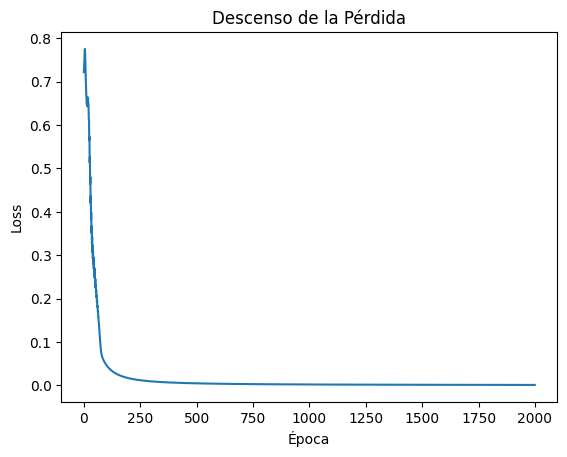

W1: [[6.69054607 8.70980976]
 [6.69024273 8.70996328]]
b1: [[ -7.93179883 -10.20782305]]
W2: [[10.03701056]
 [13.94669026]]
b2: [[-10.91432033]]


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

np.random.seed(42)

# Dataset equivalente al DataFrame anterior
X = np.array([
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0],
    [0.8, 0.9],
    [0.2, 0.1],
    [0.9, 0.8],
    [0.3, 0.4],
    [0.7, 0.6],
    [0.6, 0.7]
])

y = np.array([
    [0],
    [0],
    [0],
    [1],
    [1],
    [0],
    [1],
    [0],
    [1],
    [1]
])


# Inicialización
W1 = np.random.randn(2,2)
b1 = np.zeros((1,2))

W2 = np.random.randn(2,1)
b2 = np.zeros((1,1))

eta = 0.5
losses = []

def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_deriv(a):
    return a*(1-a)

# Entrenamiento
for epoch in range(2000):

    # Forward
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)

    z2 = a1.dot(W2) + b2
    y_hat = sigmoid(z2)

    # Loss
    loss = -np.mean(y*np.log(y_hat+1e-8)+(1-y)*np.log(1-y_hat+1e-8))
    losses.append(loss)

    # Backprop
    dL_dz2 = y_hat - y
    dL_dW2 = a1.T.dot(dL_dz2)
    dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)

    dL_da1 = dL_dz2.dot(W2.T)
    dL_dz1 = dL_da1 * sigmoid_deriv(a1)
    dL_dW1 = X.T.dot(dL_dz1)
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)

    # Update
    W2 -= eta*dL_dW2
    b2 -= eta*dL_db2
    W1 -= eta*dL_dW1
    b1 -= eta*dL_db1

# Gráfica pérdida
plt.figure()
plt.plot(losses)
plt.title("Descenso de la Pérdida")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.show()

print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)


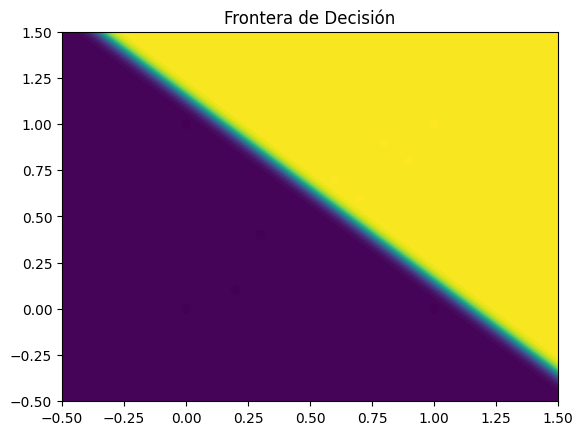

In [23]:
# Crear malla
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

grid = np.c_[xx.ravel(), yy.ravel()]

z1 = grid.dot(W1) + b1
a1 = sigmoid(z1)
z2 = a1.dot(W2) + b2
probs = sigmoid(z2)

Z = probs.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, levels=50)
plt.scatter(X[:,0], X[:,1], c=y.flatten())
plt.title("Frontera de Decisión")
plt.show()


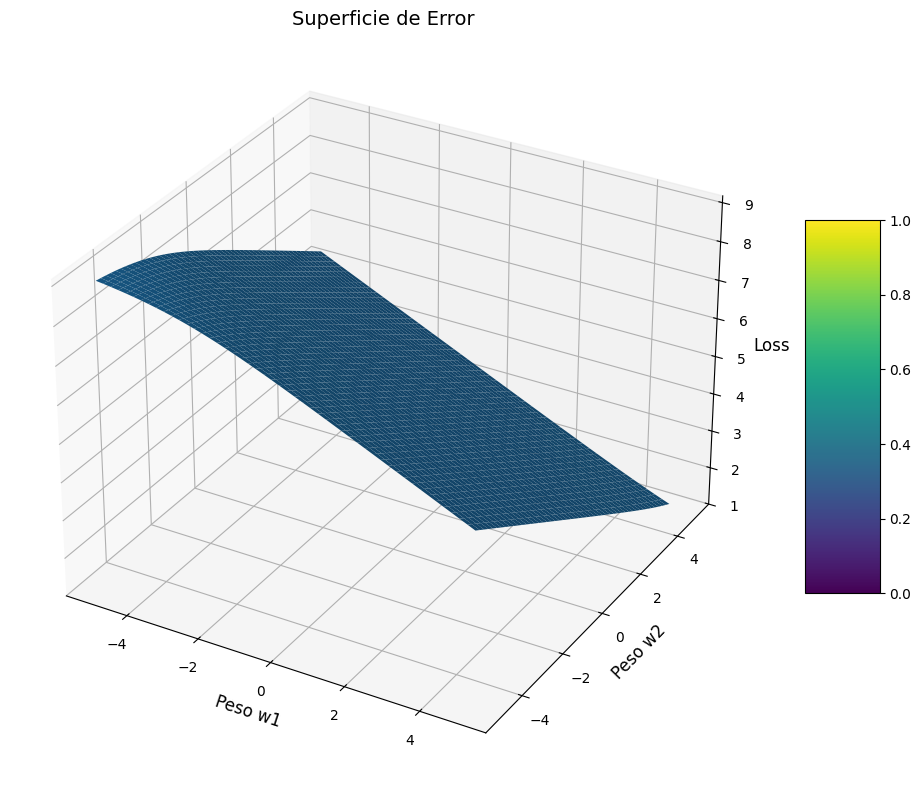

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

w_range = np.linspace(-5,5,50)
W1_vals, W2_vals = np.meshgrid(w_range, w_range)

Loss_surface = np.zeros_like(W1_vals)

for i in range(len(w_range)):
    for j in range(len(w_range)):
        temp_W2 = np.array([[W1_vals[i,j]],[W2_vals[i,j]]])

        z1 = X.dot(W1) + b1
        a1 = sigmoid(z1)
        z2 = a1.dot(temp_W2) + b2
        y_hat = sigmoid(z2)

        loss = -np.mean(y*np.log(y_hat+1e-8)+(1-y)*np.log(1-y_hat+1e-8))
        Loss_surface[i,j] = loss

#  Figura más grande
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(W1_vals, W2_vals, Loss_surface)

# Etiquetas de ejes
ax.set_xlabel("Peso w1", fontsize=12)
ax.set_ylabel("Peso w2", fontsize=12)
ax.set_zlabel("Loss", fontsize=12)

ax.set_title("Superficie de Error", fontsize=14)

# Barra de color
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()
